In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objects as go
from scipy.interpolate import griddata
from plotly.subplots import make_subplots
import plotly.io as pio

#Change style
sns.set_style("whitegrid")

In [18]:
# Load sugarscape model csv data and ignore the first 6 rows
df = pd.read_csv(os.path.join('data', 'ss_3_meta_v_growth.csv'), skiprows=6)

# Remove any rows where columns "max-vis >= min-vis" and "max-meta >= min-meta" are the string "False"
# df = df[(df['max-meta >= min-meta'] == True)]

# Remove unnecessary columns
df = df.drop(columns=['max-vis >= min-vis', 'max-meta >= min-meta', 'visualization',
                       '[run number]', 'initial-population', '[step]', 'max-vis', 'min-vis'], errors='ignore')

# Rename columns
df = df.rename(columns={'mean [metabolism] of turtles': 'mean_metabolism',
                        'mean [vision] of turtles': 'mean_vision',
                        'count turtles': 'turtles_count',
                        '(gini-index-reserve / count turtles) * 2': 'gini_index',
                        'mean [age] of turtles': 'mean_age'})

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Remove rows with NaN
df = df.dropna()

In [54]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add boxplot for gini_index
fig.add_trace(go.Box(
    x=df[df['max-meta'] == 6]['sugar-growback-rate'],
    y=df[df['max-meta'] == 6]['gini_index'],
    name='Gini Index',
    marker_color='blue'
), secondary_y=False)

# Add boxplot for mean_age
fig.add_trace(go.Box(
    x=df[df['max-meta'] == 6]['sugar-growback-rate'],
    y=df[df['max-meta'] == 6]['mean_age'],
    name='Mean age',
    marker_color='orange'
), secondary_y=True)

# Update layout
fig.update_layout(
    title=go.layout.Title(
        text="Gini Index and Mean Age vs Sugar Growback Rate <br><sup>Model 3 | Max metabolism: 6</sup>",
        xref="paper",
        x=0
    ),
    xaxis_title='Sugar Growback Rate',
    yaxis_title='Gini Index',
    yaxis2_title='Mean Age',
    legend=dict(x=0, y=1, traceorder="normal"),
    legend_title='Variables',
    height=600
)

# Update y-axis range for gini_index and turtles_count
fig.update_yaxes(range=[0, 0.55], secondary_y=False)
fig.update_yaxes(range=[0, 55], secondary_y=True)

fig.show()

pio.write_image(fig, os.path.join('plots', 'm3_grow_boxplot.png'),scale=6, width=965, height=600)

In [53]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add boxplot for gini_index
fig.add_trace(go.Box(
    x=df[df['sugar-growback-rate'] == 1]['max-meta'],
    y=df[df['sugar-growback-rate'] == 1]['gini_index'],
    name='Gini Index',
    marker_color='blue'
), secondary_y=False)

# Add boxplot for turtles_count
fig.add_trace(go.Box(
    x=df[df['sugar-growback-rate'] == 1]['max-meta'],
    y=df[df['sugar-growback-rate'] == 1]['mean_age'],
    name='Agent Count',
    marker_color='orange'
), secondary_y=True)

# Update layout
fig.update_layout(
    title=go.layout.Title(
        text="Gini Index and Mean Age vs Max Metabolism <br><sup>Model 3 | Sugar growback rate: 1</sup>",
        xref="paper",
        x=0
    ),
    xaxis_title='Max Metabolism',
    yaxis_title='Gini Index',
    yaxis2_title='Mean Age',
    legend=dict(x=0, y=0, traceorder="normal"),
    legend_title='Variables',
    height=600
)

# Update y-axis range for gini_index and turtles_count
fig.update_yaxes(range=[0, 0.55], secondary_y=False)
fig.update_yaxes(range=[0, 55], secondary_y=True)

fig.show()

pio.write_image(fig, os.path.join('plots', 'm3_meta_boxplot.png'),scale=6, width=965, height=600)

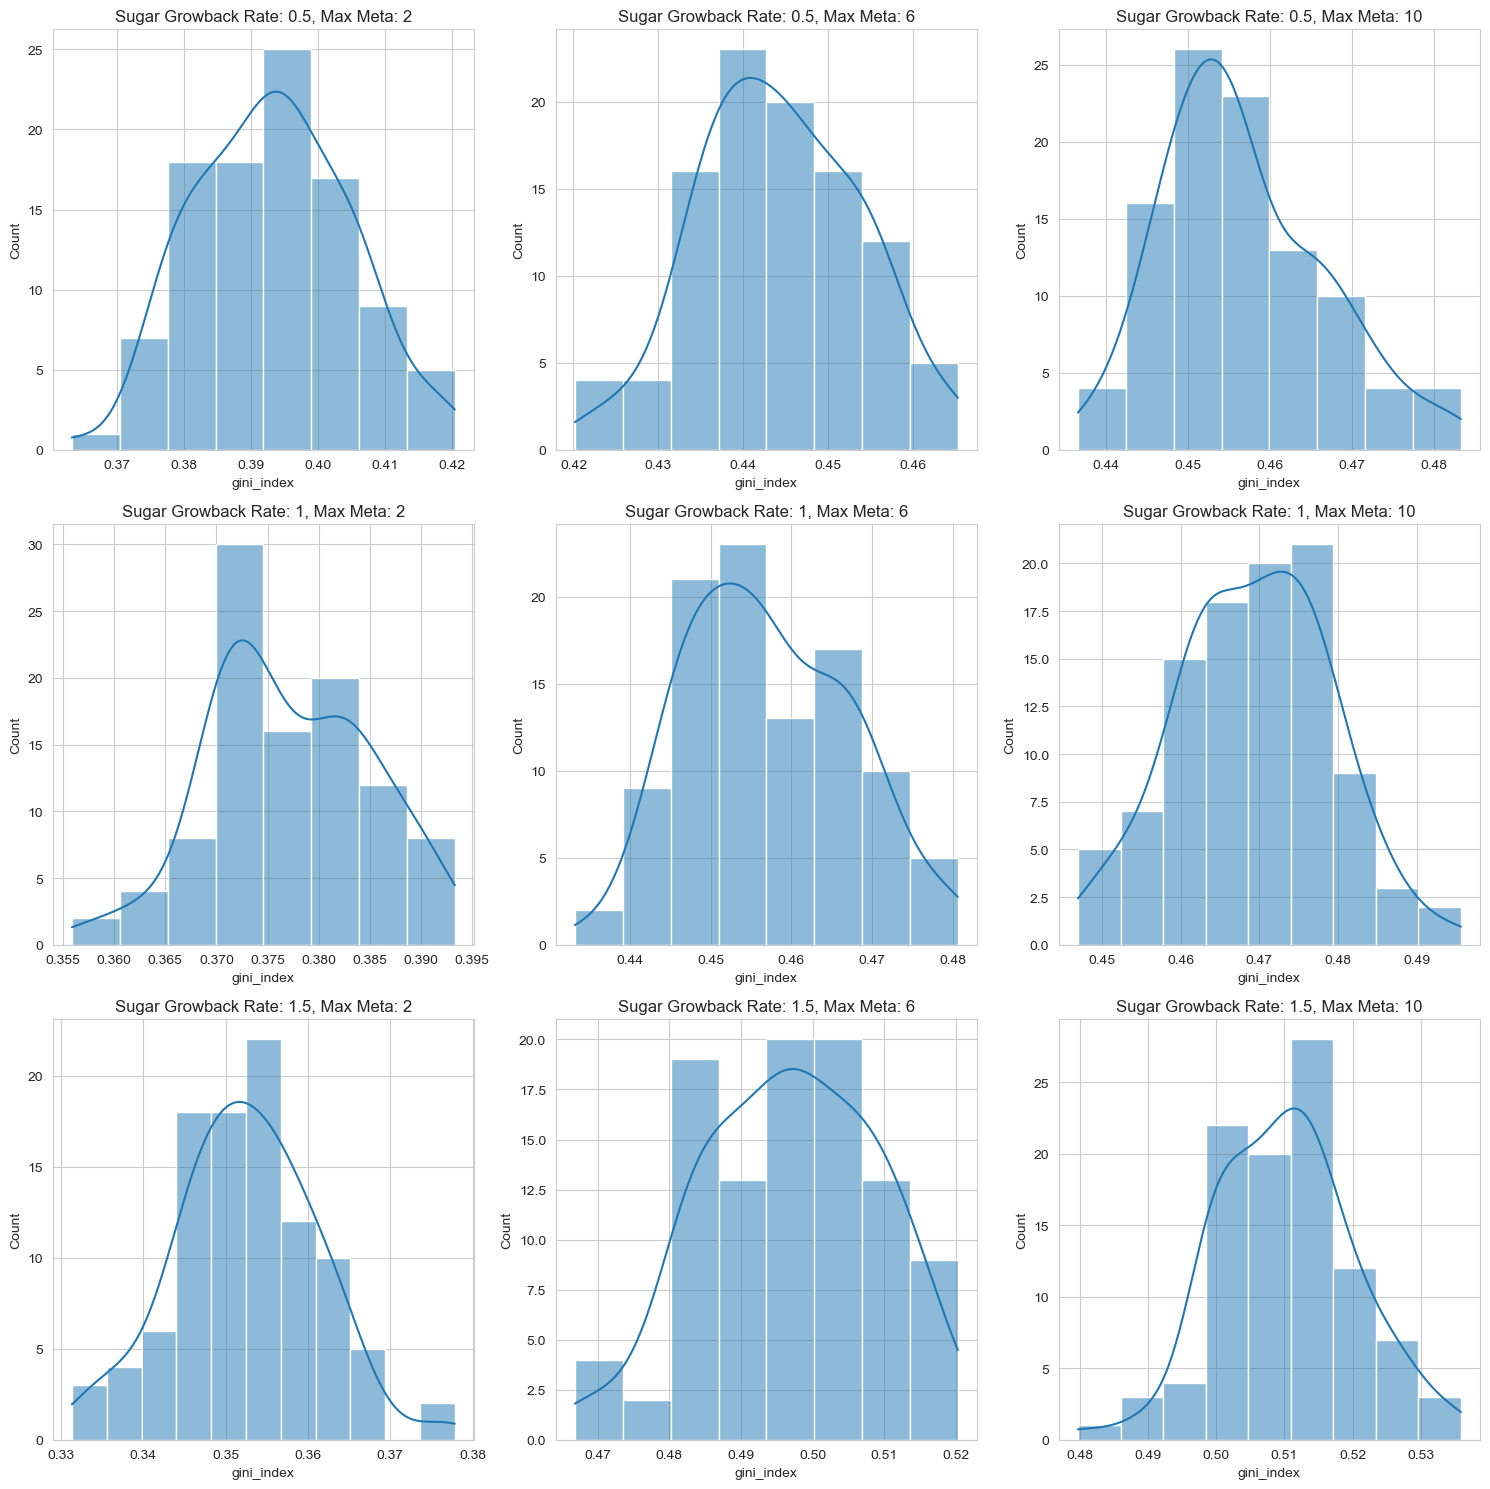

In [20]:
# Plot the gini_index and mean_age data to see if it is skewed or normally distributed when sugar growback rate is 1 and max-meta is 6
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Define the combinations of sugar growback rate and max-meta
sugar_growback_rates = [0.5, 1, 1.5]
max_meta_values = [2, 6, 10]

# Iterate over the combinations and plot the histograms
for i, sugar_growback_rate in enumerate(sugar_growback_rates):
    for j, max_meta in enumerate(max_meta_values):
        sns.histplot(df[(df['sugar-growback-rate'] == sugar_growback_rate) & (df['max-meta'] == max_meta)]['gini_index'], kde=True, ax=ax[i, j])
        ax[i, j].set_title(f'Sugar Growback Rate: {sugar_growback_rate}, Max Meta: {max_meta}')

plt.tight_layout()
plt.show()

fig.savefig(os.path.join('plots', 'm3_histogram.png'), dpi=300)

In [21]:
# Create a new df where the rows are grouped by max-meta, min-meta, and sugar-growth-rate
grouped_df = df.groupby(['max-meta', 'min-meta', 'sugar-growback-rate']).mean().reset_index()

In [22]:
grouped_df

max-meta  min-meta  sugar-growback-rate  mean_metabolism  mean_vision  \
0           1         1                  0.1          1.00000          4.0   
1           1         1                  0.2          1.00000          4.0   
2           1         1                  0.3          1.00000          4.0   
3           1         1                  0.4          1.00000          4.0   
4           1         1                  0.5          1.00000          4.0   
..        ...       ...                  ...              ...          ...   
195        10         1                  1.6          2.45870          4.0   
196        10         1                  1.7          2.47296          4.0   
197        10         1                  1.8          2.48066          4.0   
198        10         1                  1.9          2.49396          4.0   
199        10         1                  2.0          2.51806          4.0   

     gini_index  mean_age  
0      0.387246  14.74828  
1      0.335700  36.92126  
2      0.198631  43.99466  
3      0.195412  43.96406  
4      0.224446  44.03046  
..          ...       ...  
195    0.512417  33.11068  
196    0.511238  33.25052  
197    0.511238  33.40876  
198    0.508536  33.44596  
199    0.510352  33.21374  

[200 rows x 7 columns]

In [23]:
# Make a heatmap of the median gini index for each combination of max-meta, and sugar-growback-rate using plotly go
fig = px.imshow(grouped_df.pivot(index='max-meta', columns='sugar-growback-rate', values='gini_index'),
                labels=dict(x="Sugar Growback Rate", y="Max Meta", color="Gini Index"),
                x=grouped_df['sugar-growback-rate'].unique(),
                y=grouped_df['max-meta'].unique(),
                color_continuous_scale='viridis_r',  # Inverse the color map
                aspect='auto')

fig.update_layout(
    title=go.layout.Title(
        text="Mean Gini Index for each combination of Max Metabolism and Sugar Growback Rate <br><sup>Model 3</sup>",
        xref="paper",
        x=0
    ),
    coloraxis=dict(
        cmin=0,
        cmax=0.5
    )
)

# Add text annotations for each value in the heatmap
for i in range(len(grouped_df['max-meta'].unique())):
    for j in range(len(grouped_df['sugar-growback-rate'].unique())):
        value = grouped_df.pivot(index='max-meta', columns='sugar-growback-rate', values='gini_index').iloc[i, j]
        fig.add_annotation(text=f'{value:.2f}',  # Round to 2 decimal places
                           x=grouped_df['sugar-growback-rate'].unique()[j],
                           y=grouped_df['max-meta'].unique()[i],
                           showarrow=False,
                           font=dict(color='white', size=8))  # Adjust font size as needed

fig.show()

# Save the plot
pio.write_image(fig, os.path.join('plots', 'm3_gini_heatmap.png'),scale=6, width=965, height=450)

In [56]:
# Make a heatmap of the median gini index for each combination of max-meta, and sugar-growback-rate using plotly go
fig = px.imshow(grouped_df.pivot(index='max-meta', columns='sugar-growback-rate', values='mean_age'),
                labels=dict(x="Sugar Growback Rate", y="Max Meta", color="Mean Age"),
                x=grouped_df['sugar-growback-rate'].unique(),
                y=grouped_df['max-meta'].unique(),
                color_continuous_scale='viridis',  # Inverse the color map
                aspect='auto')

fig.update_layout(
    title=go.layout.Title(
        text="Mean Age for each combination of Max Metabolism and Sugar Growback Rate <br><sup>Model 3</sup>",
        xref="paper",
        x=0
    ),
    coloraxis=dict(
        cmin=0,
        cmax=50
    )
)

# Add text annotations for each value in the heatmap
for i in range(len(grouped_df['max-meta'].unique())):
    for j in range(len(grouped_df['sugar-growback-rate'].unique())):
        value = grouped_df.pivot(index='max-meta', columns='sugar-growback-rate', values='mean_age').iloc[i, j]
        fig.add_annotation(text=f'{value:.2f}',  # Round to 2 decimal places
                           x=grouped_df['sugar-growback-rate'].unique()[j],
                           y=grouped_df['max-meta'].unique()[i],
                           showarrow=False,
                           font=dict(color='white', size=8))  # Adjust font size as needed

fig.show()

# Save the plot
pio.write_image(fig, os.path.join('plots', 'm3_pop_heatmap.png'),scale=6, width=965, height=450)

In [45]:
from scipy.optimize import minimize
import numpy as np

# Define the bounds
max_meta_bounds = (1, 10)  # Min and max values for max-meta
sugar_growback_rate_bounds = (0.1, 2)  # Min and max values for sugar-growback-rate

# Define the step size for each parameter
max_meta_step = 1  # Step size for max-meta
sugar_growback_rate_step = 0.1  # Step size for sugar-growback-rate

# Generate the grid of parameter values within the bounds
max_meta_values = np.arange(max_meta_bounds[0], max_meta_bounds[1] + max_meta_step, max_meta_step)
sugar_growback_rate_values = np.arange(sugar_growback_rate_bounds[0], sugar_growback_rate_bounds[1] + sugar_growback_rate_step, sugar_growback_rate_step)

# Generate all possible combinations of parameter values
parameter_combinations = [(max_meta, sugar_growback_rate) for max_meta in max_meta_values for sugar_growback_rate in sugar_growback_rate_values]

# Define the objective function
def objective(x, df):
    max_meta, sugar_growback_rate = x
    df_filtered = df[(df['max-meta'] == max_meta) & (df['sugar-growback-rate'] == sugar_growback_rate)]
    if df_filtered.empty:
        return float('inf')  # Return a large value if no rows satisfy the conditions
    else:
        gini_index = df_filtered['gini_index'].values[0]
        mean_age = -df_filtered['mean_age'].values[0]  # negative to maximize
        # Adjust the weights to prioritize mean_age over gini_index
        return 2 * mean_age + gini_index

# Minimize the objective function for all parameter combinations
min_objective = float('inf')
optimal_parameters = None
for parameters in parameter_combinations:
    result = minimize(objective, parameters, args=(grouped_df,), bounds=[max_meta_bounds, sugar_growback_rate_bounds])
    if result.success and result.fun < min_objective:
        min_objective = result.fun
        optimal_parameters = result.x

# Extract the optimal values
if optimal_parameters is not None:
    optimal_max_meta, optimal_sugar_growback_rate = optimal_parameters
    optimal_gini_index = grouped_df[(grouped_df['max-meta'] == optimal_max_meta) & (grouped_df['sugar-growback-rate'] == optimal_sugar_growback_rate)]['gini_index'].values[0]
    optimal_mean_age = grouped_df[(grouped_df['max-meta'] == optimal_max_meta) & (grouped_df['sugar-growback-rate'] == optimal_sugar_growback_rate)]['mean_age'].values[0]

    print("Optimal max-meta:", optimal_max_meta)
    print("Optimal sugar-growback-rate:", optimal_sugar_growback_rate)
    print("Optimal gini_index:", optimal_gini_index)
    print("Optimal mean_age:", optimal_mean_age)
else:
    print("Optimization failed. No feasible solution found.")


Optimal max-meta: 1.0
Optimal sugar-growback-rate: 0.9
Optimal gini_index: 0.259247153497681
Optimal mean_age: 44.13394


In [30]:


# Assuming grouped_df contains your data

# Define grid
x = grouped_df['sugar-growback-rate']
y = grouped_df['max-meta']
z = grouped_df['gini_index']
xi = np.linspace(x.min(), x.max(), 200)
yi = np.linspace(y.min(), y.max(), 200)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='linear')

# Create surface plot
fig = go.Figure(data=[go.Surface(x=xi, y=yi, z=zi)])

# Update layout
fig.update_layout(scene=dict(
                    xaxis_title='Sugar Growback Rate',
                    yaxis_title='Max Metabolism',
                    zaxis_title='Gini Index'))

fig.show()

In [26]:
# Make another plot like the one above, but instead of points created a surface plot
fig = px.scatter_3d(grouped_df, x='sugar-growback-rate', y='max-meta', z='gini_index')
fig.update_traces(mode='markers')
fig.add_traces(px.scatter_3d(grouped_df, x='sugar-growback-rate', y='max-meta', z='gini_index').data)
fig.update_traces(marker=dict(size=5))
fig.update_traces(mode='markers', marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(scene = dict(
                    xaxis_title='sugar-growback-rate',
                    yaxis_title='max-meta',
                    zaxis_title='gini_index'))
fig.show()

In [27]:
# Do a linear regression on the data using statsmodels
X = grouped_df[['sugar-growback-rate', 'max-meta']]
y = grouped_df['gini_index']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gini_index   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           9.84e-38
Time:                        18:45:46   Log-Likelihood:                 322.39
No. Observations:                 200   AIC:                            -638.8
Df Residuals:                     197   BIC:                            -628.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2739      0.010     28.184      0.000       0.255       0.293
sugar-growback-rate     0.0652      0.006     10.931      0.000       0.053       0.077
max-meta                0.0147      0.001     12.306      0.000       0.012       0.017
==============================================================================
Omnibus:                        6.366   Durbin-Watson:                   0.466
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.530
Skew:                          -0.421   Prob(JB):                       0.0382
Kurtosis:                       2.729   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""